# ELECTION DATA PROJECT
## Analyzing the recent 2012 US Election Data

1) Utilizing two datasets (a) Results of political polls. (b) Aggregated poll data

Questions from FIRST dataset

1) Candidate being polled and their part affiliation?

2) Poll Results favor Romney or Obama?

3) Effect of undecided voters on polls?

4) Accounting for undecided voters?

5) Did voter sentiment change over time?

6) After debates, do polls change?

In [2]:
# Standard import libraries

import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Standard visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#taking care of int division
from __future__ import division

Source for polls: HuffPost Pollster http://elections.huffingtonpost.com/pollster

Using module "requests" to import data from web. 

Refresher: http://docs.python-requests.org/en/latest/

Using StringIO to work with CSV data from Huffpost

Refresher: https://pymotw.com/2/StringIO/


In [3]:
#Getting data from the web(HTTP capabilities)
import requests

#Getting data from csv file using StringIO.
#DataFrame requires a .read() method
from StringIO import StringIO

In [4]:
#URL for Huffpost pollster
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

#Using requests to get info in text format
source = requests.get(url).text

#Using StringIO to avoid an IO error with pandas
poll_data = StringIO(source)


In [5]:
#Initializing poll dataframe in pandas
poll_df = pd.read_csv(poll_data)

poll_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 588
Data columns (total 14 columns):
Pollster                  589 non-null object
Start Date                589 non-null object
End Date                  589 non-null object
Entry Date/Time (ET)      589 non-null object
Number of Observations    567 non-null float64
Population                589 non-null object
Mode                      589 non-null object
Obama                     589 non-null int64
Romney                    589 non-null int64
Undecided                 422 non-null float64
Pollster URL              589 non-null object
Source URL                587 non-null object
Partisan                  589 non-null object
Affiliation               589 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 69.0+ KB


In [6]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 2000-01-01 08:40:26 UTC,1000,Likely Voters,Live Phone,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05 2000-01-01 18:30:15 UTC,3000,Likely Voters,Live Phone,49,48,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 2000-01-01 09:22:02 UTC,872,Likely Voters,Automated Phone,48,48,4,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06 2000-01-01 07:38:41 UTC,1041,Likely Voters,Internet,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 2000-01-01 08:47:50 UTC,1500,Likely Voters,Automated Phone,48,49,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


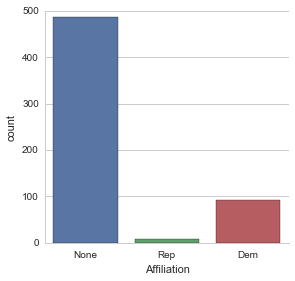

In [7]:
# Checking Affiliation of the polls conducted
sns.factorplot('Affiliation',data=poll_df,kind='count')
#CONCLUSION: Most of them are unaffiliated, which is a good sign.
#CONCLUSION: Democratic affiliated polls > Republican affiliated polls

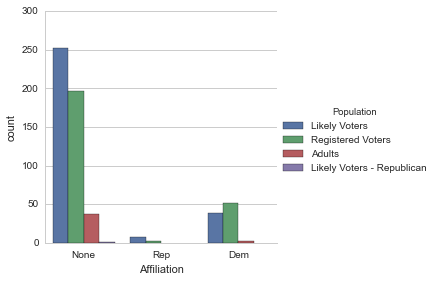

In [8]:
# Checking Affiliation of the polls conducted
#Population 4 categories
sns.factorplot('Affiliation',data=poll_df,kind='count', hue = 'Population')
#CONCLUSION: As likely voters and registered voters are high,
#the poll data should be a fair representation of the populations polled.

C:\Users\seeth_000\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


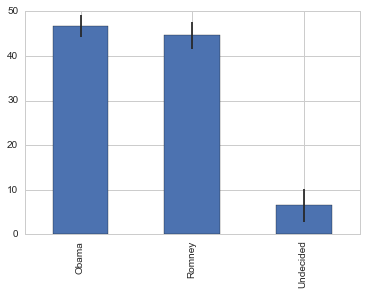

In [9]:
#Average for Obama, Romney and Undecided voters

#Calculating mean
avg = DataFrame(poll_df.mean()) #calculates mean on columns that
                                #can have a mean calculated for.
avg.drop('Number of Observations', axis = 0, inplace = True)

#Calculating SD
std = DataFrame(poll_df.std())
std.drop('Number of Observations',axis = 0,inplace = True)

# Using pandas "plot" with kind="bar" and yerr='std'
avg.plot(yerr=std,kind='bar',legend=False)

#CONCLUSION: Results are pretty close, and as the undecided voters are small,
#this race seems to be a tight one

In [10]:
# put avg and std together
poll_avg = pd.concat([avg,std],axis=1)
poll_avg.columns = ['Average','STD']
poll_avg


,Average,STD
Obama,46.772496,2.448627
Romney,44.573854,2.927711
Undecided,6.549763,3.702235


In [11]:
#To know where the undecided voters might have voted
# taking a look at voter sentiment and poll end dates

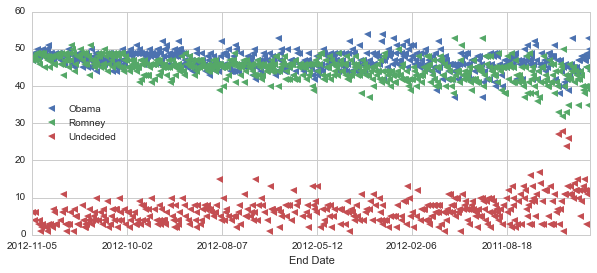

In [12]:
#Plot of sentiment in the polls over time
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],marker='<',
             linestyle='',figsize=(10,4))
#Conclusion: towards the end of the poll information, obama and romney have 
#equal stake at winning the election

In [13]:
#importing datetime
from datetime import datetime
#Adding a new column which is difference in poll favor in %
poll_df['Difference']= (poll_df.Obama - poll_df.Romney)/100

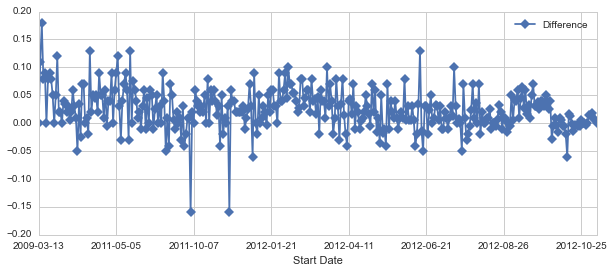

In [14]:
#as_index=Flase to keep the 0,1,2,... index. 
#Then we'll take the mean of the polls on that day.
poll_df=poll_df.groupby(['Start Date'],as_index=False).mean()

#plotting difference means of polls groupedby same start date
poll_df.plot(x='Start Date',y='Difference',marker='D',linestyle='-',figsize=(10,4))

#CONCLUSION: romney on two specific dates, he had major advantage in poles
#towards the end the race was getting a close

In [15]:
#Checking to see if debates effected the polls
#debate dates, oct3rd, oct 11 and oct22nd of 2012. 
#Plotting lines as markers and zoom into month of october
#Due to the string-formatted date, a loop is used to cycle 
#the column and look for 2012-10

row_in = 0
xlimit =[]

for data in poll_df['Start Date']:
    if data[0:7]=='2012-10':
        xlimit.append(row_in)
    row_in += 1
    
#printing the row limits for month of october
print min(xlimit)
print max(xlimit)

329
356


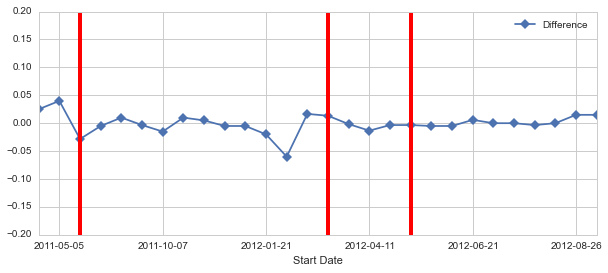

In [19]:
#plotting original data+markers
poll_df.plot(x='Start Date',y='Difference',marker='D',xlim=(329,356),
             linestyle='-',figsize=(10,4))

#first debate oct3rd, looking at polls on oct4th, row id=331
plt.axvline(x=331,linewidth=4,color='red')
#second debate oct16th, looking at polls on oct17th, row id=343
plt.axvline(x=343,linewidth=4,color='red')
#third debate oct22nd, looking at polls on oct23rd, row id=347
plt.axvline(x=347,linewidth=4,color='red')

#CONCLUSION: first debate obama favorable, second debate romney favorable
#third debate is neutral

# DONOR DATA SET

Analyzing the donations to the federal campaign.

Location: https://www.dropbox.com/s/l29oppon2veaq4n/Election_Donor_Data.csv?dl=0

(150MB)

Questions:

1) How much donated, average donation?

2) Difference in donation between candidates

3) Donations differ from democrats to republicans

4) Donor Demography

5) Patterns in donation amounts?



In [23]:
#Read csv file into a dataframe
donor_df = pd.read_csv('Election_Donor_Data.csv')
donor_df.info()
donor_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 129.9+ MB


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [24]:
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 236.07          1
 153.60          1
 116.35          1
 233.33          1
 86.21           1
 600.74          1
 130.20          1
 50.04           1
 78.55           1
 266.10          1
 77.83           1
 222.75          1
 217.75          1
 261.50          1
 240.25          1
-45.50           1
 161.50          1
 268.76          1
 100.56          1
 6.26            1
 114.43          1
 823.88     

In [25]:
#average donation and variation
don_mean = donor_df['contb_receipt_amt'].mean()
don_std = donor_df['contb_receipt_amt'].std()
print "Average donation %.2f with a SD of %.2f" %(don_mean,don_std)
#huge SD

Average donation 298.24 with a SD of 3749.67


In [52]:
top_donor = donor_df['contb_receipt_amt'].copy()
top_donor.sort_values()
top_donor
# negative values are refunds or are not part of donations.

0           250
1            50
2           250
3           250
4           300
5           500
6           250
7           250
8           250
9           250
10          250
11          500
12          250
13          250
14          250
15          300
16          500
17         1000
18          250
19          300
20          500
21          250
22         2500
23         2500
24          150
25          200
26          100
27          250
28          500
29          250
           ... 
1001701    2500
1001702    2500
1001703   -2500
1001704   -2500
1001705    1000
1001706    2500
1001707   -2500
1001708    2500
1001709   -2500
1001710   -2500
1001711    1000
1001712    2500
1001713    2500
1001714     250
1001715     250
1001716    1000
1001717     100
1001718    2500
1001719    2500
1001720     100
1001721     250
1001722     100
1001723     100
1001724     500
1001725    2500
1001726    5000
1001727    2500
1001728     500
1001729     500
1001730    2500
Name: contb_receipt_amt,

In [56]:
top_donor = top_donor[top_donor>0]
#removing refunds/negative values

In [57]:
top_donor.sort_values(inplace=True)
top_donor.value_counts().head(10)
#counting the top donations
#conclusion: seems like top donations are between 10-2500
#Also integer value donations are popular

100     178188
50      137584
25      110345
250      91182
500      57984
2500     49005
35       37237
1000     36494
10       33986
200      27813
Name: contb_receipt_amt, dtype: int64

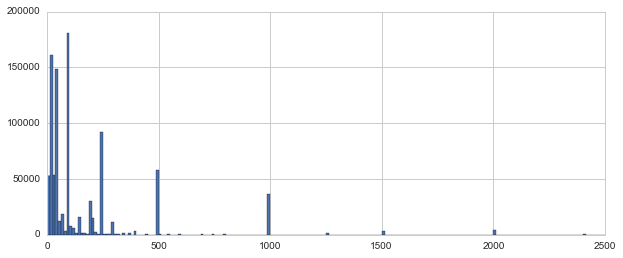

In [62]:
# seeing the most(more than 10000 in count) contributed amounts (<2500)
com_don = top_donor[top_donor < 2500]
com_don.hist(bins=200,figsize=(10,4))


In [63]:
#Separating donations by Party.
#Creating a new column called "Party" 
#Extracting candidates and affilations

#Grabbing unique objects from the candidate column
candidates = donor_df.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [67]:
# Adding Dictionary of party affiliation, apart from obama, rest are Reps
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}
donor_df['Party'] = donor_df.cand_nm.map(party_map)
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [66]:
#removing refunds
donor_df = donor_df[donor_df.contb_receipt_amt>0]
donor_df.info()
#total rows reduced


<class 'pandas.core.frame.DataFrame'>
Int64Index: 991475 entries, 0 to 1001730
Data columns (total 17 columns):
cmte_id              991475 non-null object
cand_id              991475 non-null object
cand_nm              991475 non-null object
contbr_nm            991475 non-null object
contbr_city          991457 non-null object
contbr_st            991471 non-null object
contbr_zip           991373 non-null object
contbr_employer      983833 non-null object
contbr_occupation    989133 non-null object
contb_receipt_amt    991475 non-null float64
contb_receipt_dt     991475 non-null object
receipt_desc         5219 non-null object
memo_cd              89461 non-null object
memo_text            94274 non-null object
form_tp              991475 non-null object
file_num             991475 non-null int64
Party                991475 non-null object
dtypes: float64(1), int64(1), object(15)
memory usage: 136.2+ MB


In [97]:
#grouping by candidate names and counting the number of donations
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()
#obama being onlt dem candidate, has max donations

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [110]:
#total amount received
cand_sum=donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

'''
#indexing from 0 in groupby object
i=0
for cand in cand_sum:
    print "The candidate %s raised $%0.f\n " %(cand_sum.index[i],cand)
    i += 1
'''

'\n#indexing from 0 in groupby object\ni=0\nfor cand in cand_sum:\n    print "The candidate %s raised $%0.f\n " %(cand_sum.index[i],cand)\n    i += 1\n'

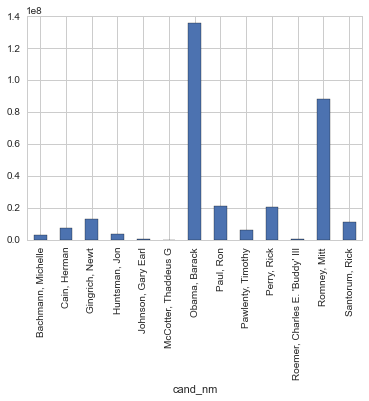

In [145]:
#Plotting total donations
cand_sum.plot(kind='bar')
#obama has more donations as he enjoys being a single rep for DEMS

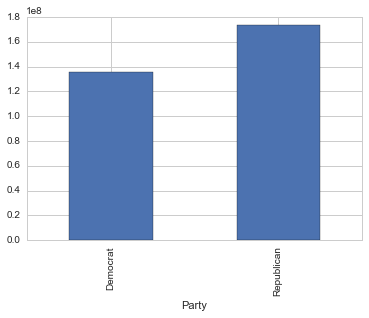

In [146]:
#grouping party wise and summing donations
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')
#Conclusion OBAMA couldn't beat the total donations by REPS

In [147]:
#What is the occupation of donors?
#Defining a occupation DF that extracts contributor occupation
#and use pivot table to make the index=ocupations, columns=DEMS,REPS
#aggregate the sum of all contributions by each occupation

occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                     index='contbr_occupation',
                                    columns='Party',
                                    aggfunc='sum')
occupation_df.head()


Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100,NaN
AREA VICE PRESIDENT,250,NaN
RESEARCH ASSOCIATE,100,NaN
TEACHER,500,NaN
THERAPIST,3900,NaN


In [148]:
occupation_df.shape
#lot of varied occupations

(45067, 2)

In [149]:
#reducing the occupations by setting a limit for total contribution
#from an occupation as 1 million dollars
#adding column wise axis=1
occupation_df = occupation_df[occupation_df.sum(axis=1)>1000000]
occupation_df.shape
#reduced to 31 occupation

(31, 2)

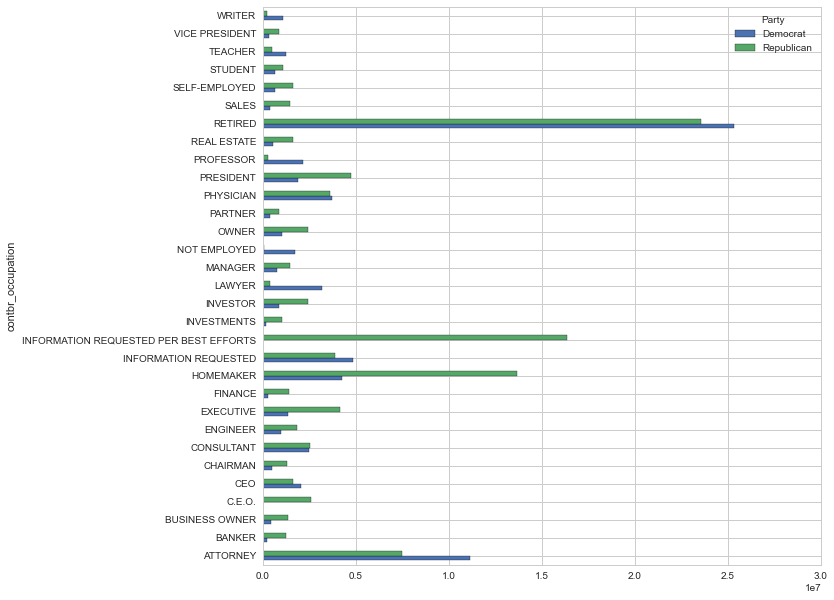

In [150]:
#plotting the million dollar donation occupations
occupation_df.plot(kind='barh',figsize=(10,10))

In [151]:
#dropping missing info occupations, combining CEO and C.E.O
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
# Drop CEO
occupation_df.drop('C.E.O.',inplace=True)

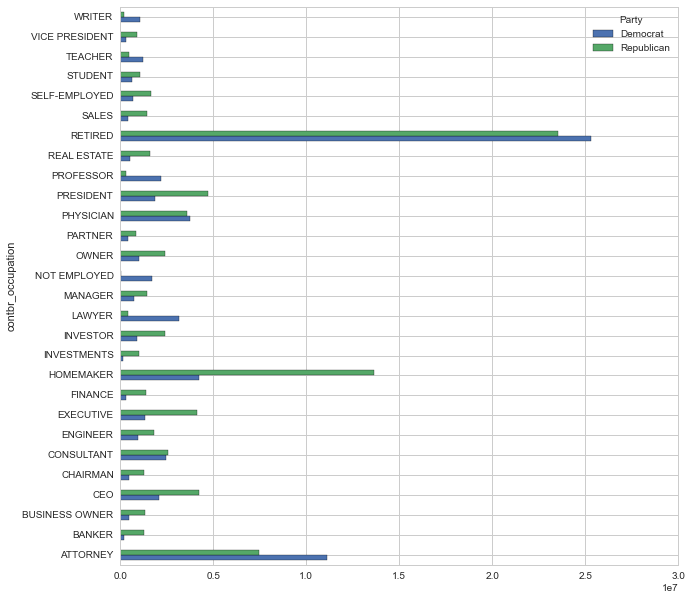

In [152]:
occupation_df.plot(kind='barh',figsize=(10,10))

In [ ]:
#CONCLUSION:
#Retirees are major contributors, DEM supporters
#CEOs are REP oriented, tax cuts by DEM ar emore aggressive for big companies
#Homemakers are more REP oriented
#Intellectual fields such as teachers, writers, professors, lawyers/attorneys are 
#DEM oriented